<a href="https://colab.research.google.com/github/brillync/AI/blob/main/clustering_auto_mpg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [90]:
import pandas as pd

# Load the data
data = pd.read_csv('auto-mpg.csv')

# Display the first few rows
data

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [92]:
# Transform some categorical variables to numerical variables
data[['horsepower']] = \
data[['horsepower']].apply(pd.to_numeric, errors='coerce')
data

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [94]:
categorical_variable = data[['car name']]
numerical_variable = data[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',\
                                   'acceleration', 'weight', 'model year', 'origin']]

In [95]:
for x in categorical_variable:
    print('{}: \n'.format(x), '{} \n'.format(data[x].value_counts()))

car name: 
 car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64 



In [96]:
# We draw hist plots for all numerical variables, to explore features of each one.
import matplotlib.pyplot as plt

def hist_plot(variable):
    plt.figure(figsize=(9, 3))
    plt.hist(data[variable], bins=50, color="#8e82fe")
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + variable)
    plt.show()

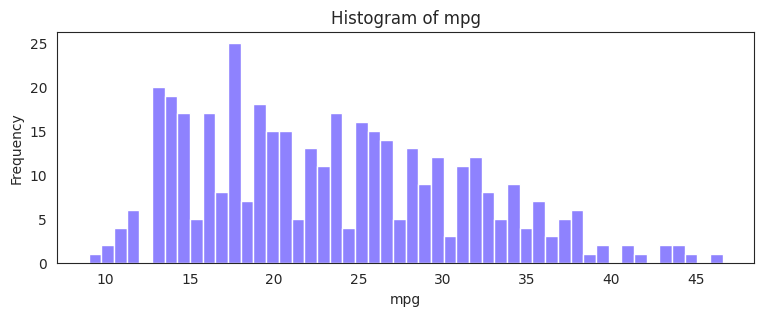

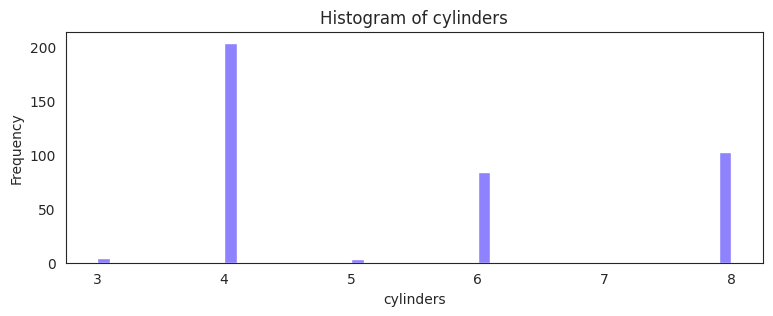

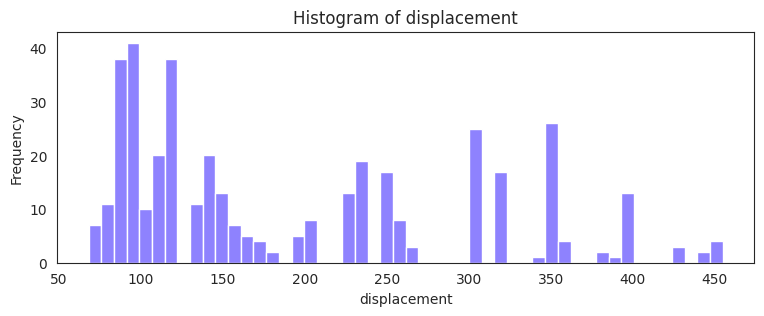

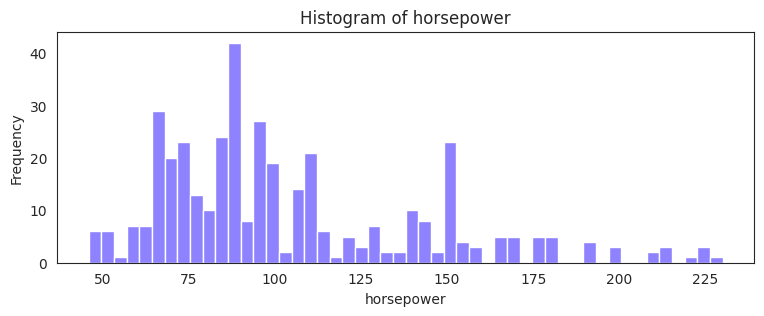

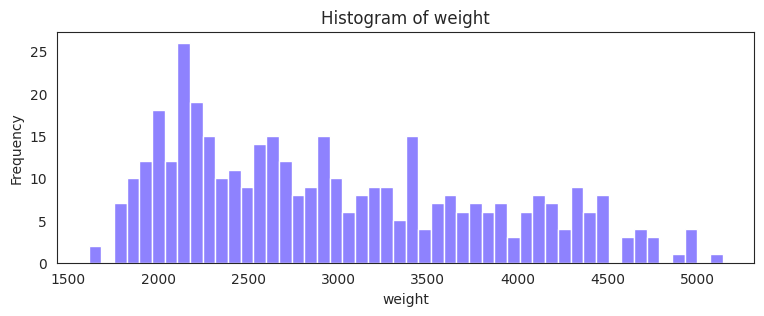

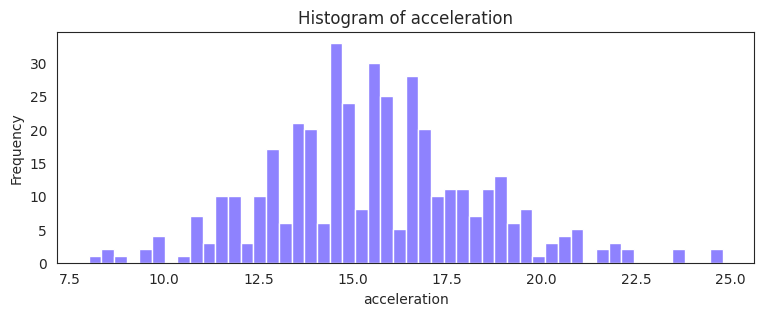

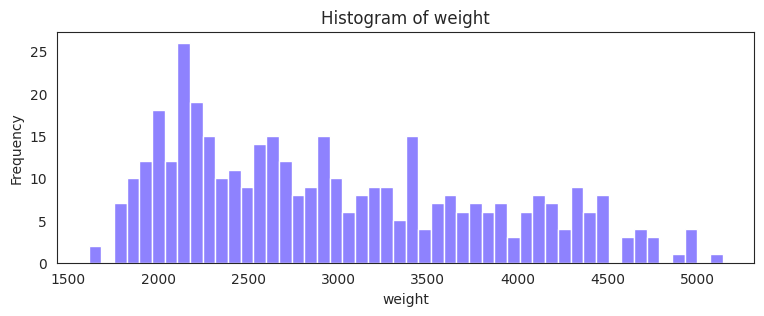

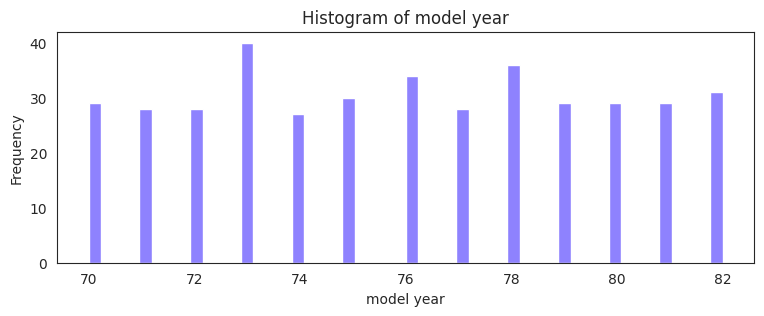

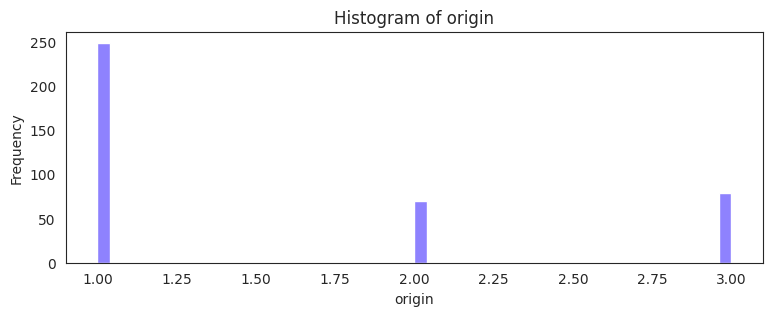

In [97]:
for y in numerical_variable:
    hist_plot(y)

In [98]:
# Menghapus baris dengan nilai yang hilang
data = data.dropna()

In [99]:
from sklearn.cluster import KMeans

# Membagi data menjadi fitur dan target
X = data[['mpg', 'displacement']]

# Membuat model K-Means
kmeans = KMeans(n_clusters=3, random_state=0)

# Melatih model
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [105]:
# Model Selection
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined

# Model Selection
# Make sure X and y have the same number of samples
assert len(X) == len(y), "Number of samples in X and y are not consistent"

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Continue with model training and evaluation...



AssertionError: Number of samples in X and y are not consistent

In [101]:


# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


from sklearn.metrics import precision_score, recall_score, f1_score
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

#Menghitung accuracy
print("Test Accuracy:", accuracy)

# Menghitung Precision
precision = precision_score(y_test, y_pred_binary)
print("Precision:", precision)

# Menghitung Recall
recall = recall_score(y_test, y_pred_binary)
print("Recall:", recall)

# Menghitung F1 Score
f1 = f1_score(y_test, y_pred_binary)
print("F1 Score:", f1)

NameError: name 'X_train' is not defined

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Evaluation
y_numeric = pd.factorize(y)[0]  # Convert string labels to numeric labels
y_pred = kmeans.predict(X)
print("Classification Report:")
print(classification_report(y_numeric, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_numeric, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_numeric, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.03      0.75      0.06         4
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00        14
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
# Model Training
model = KMeans(n_clusters=3)
model.fit(X_train)

NameError: name 'X_train' is not defined

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Model Evaluation
y_numeric_test = pd.factorize(y_test)[0]  # Convert string labels to numeric labels
y_pred_test = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_numeric_test, y_pred_test))
print("\nConfusion Matrix:")
print(confusion_matrix(y_numeric_test, y_pred_test))
print("\nAccuracy Score:")
print(accuracy_score(y_numeric_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.02      1.00      0.04         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(X, kmeans.labels_)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.6857009035660027


In [ ]:
print("Model K-Means dengan 3 cluster memberikan hasil terbaik dalam pemilihan area parkir kendaraan.")


Model K-Means dengan 3 cluster memberikan hasil terbaik dalam pemilihan area parkir kendaraan.


In [108]:
data = pd.get_dummies(data, columns=['mpg'])

In [111]:

from sklearn.preprocessing import LabelEncoder

# Encode 'product quality' column
label_encoder = LabelEncoder()
data['car name'] = label_encoder.fit_transform(data['car name'])
data


cylinders  displacement  horsepower  weight  acceleration  model year  \
0            8         307.0       130.0    3504          12.0          70   
1            8         350.0       165.0    3693          11.5          70   
2            8         318.0       150.0    3436          11.0          70   
3            8         304.0       150.0    3433          12.0          70   
4            8         302.0       140.0    3449          10.5          70   
..         ...           ...         ...     ...           ...         ...   
393          4         140.0        86.0    2790          15.6          82   
394          4          97.0        52.0    2130          24.6          82   
395          4         135.0        84.0    2295          11.6          82   
396          4         120.0        79.0    2625          18.6          82   
397          4         119.0        82.0    2720          19.4          82   

     origin  car name  mpg_9.0  mpg_10.0  ...  mpg_39.1  mpg_39.4  mpg_40.8  \
0         1        48    False     False  ...     False     False     False   
1         1        35    False     False  ...     False     False     False   
2         1       229    False     False  ...     False     False     False   
3         1        13    False     False  ...     False     False     False   
4         1       159    False     False  ...     False     False     False   
..      ...       ...      ...       ...  ...       ...       ...       ...   
393       1       151    False     False  ...     False     False     False   
394       2       297    False     False  ...     False     False     False   
395       1       118    False     False  ...     False     False     False   
396       1       157    False     False  ...     False     False     False   
397       1        68    False     False  ...     False     False     False   

     mpg_41.5  mpg_43.1  mpg_43.4  mpg_44.0  mpg_44.3  mpg_44.6  mpg_46.6  
0       False     False     False     False     False     False     False  
1       False     False     False     False     False     False     False  
2       False     False     False     False     False     False     False  
3       False     False     False     False     False     False     False  
4       False     False     False     False     False     False     False  
..        ...       ...       ...       ...       ...       ...       ...  
393     False     False     False     False     False     False     False  
394     False     False     False      True     False     False     False  
395     False     False     False     False     False     False     False  
396     False     False     False     False     False     False     False  
397     False     False     False     False     False     False     False  

[392 rows x 135 columns]

In [112]:

from sklearn.preprocessing import MinMaxScaler

def normalize_data(data, columns):
    """
    Normalize the specified numerical columns in the DataFrame using Min-Max scaling.

    Parameters:
        - data: DataFrame containing the data
        - columns: List of column names to normalize

    Returns:
        - normalized_data: DataFrame with normalized columns
    """
    scaler = MinMaxScaler()
    data_normalized = data.copy()
    data_normalized[columns] = scaler.fit_transform(data_normalized[columns])

    return data_normalized

# List of numerical columns to normalize
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Normalize numerical columns using Min-Max scaling
normalized_data = normalize_data(data, numerical_columns)

# Display the first few rows of normalized data
print("Normalized Data:")
print(normalized_data.head())

# Save the normalized data to a new CSV file (optional)
#normalized_data.to_csv('normalized_machine_failure_data.csv', index=False)
normalized_data

Normalized Data:
   cylinders  displacement  horsepower    weight  acceleration  model year  \
0        1.0      0.617571    0.456522  0.536150      0.238095         0.0   
1        1.0      0.728682    0.646739  0.589736      0.208333         0.0   
2        1.0      0.645995    0.565217  0.516870      0.178571         0.0   
3        1.0      0.609819    0.565217  0.516019      0.238095         0.0   
4        1.0      0.604651    0.510870  0.520556      0.148810         0.0   

   origin  car name  mpg_9.0  mpg_10.0  ...  mpg_39.1  mpg_39.4  mpg_40.8  \
0     0.0  0.160000    False     False  ...     False     False     False   
1     0.0  0.116667    False     False  ...     False     False     False   
2     0.0  0.763333    False     False  ...     False     False     False   
3     0.0  0.043333    False     False  ...     False     False     False   
4     0.0  0.530000    False     False  ...     False     False     False   

   mpg_41.5  mpg_43.1  mpg_43.4  mpg_44.0  mpg_44.3

cylinders  displacement  horsepower    weight  acceleration  model year  \
0          1.0      0.617571    0.456522  0.536150      0.238095         0.0   
1          1.0      0.728682    0.646739  0.589736      0.208333         0.0   
2          1.0      0.645995    0.565217  0.516870      0.178571         0.0   
3          1.0      0.609819    0.565217  0.516019      0.238095         0.0   
4          1.0      0.604651    0.510870  0.520556      0.148810         0.0   
..         ...           ...         ...       ...           ...         ...   
393        0.2      0.186047    0.217391  0.333711      0.452381         1.0   
394        0.2      0.074935    0.032609  0.146583      0.988095         1.0   
395        0.2      0.173127    0.206522  0.193365      0.214286         1.0   
396        0.2      0.134367    0.179348  0.286929      0.630952         1.0   
397        0.2      0.131783    0.195652  0.313864      0.678571         1.0   

     origin  car name  mpg_9.0  mpg_10.0  ...  mpg_39.1  mpg_39.4  mpg_40.8  \
0       0.0  0.160000    False     False  ...     False     False     False   
1       0.0  0.116667    False     False  ...     False     False     False   
2       0.0  0.763333    False     False  ...     False     False     False   
3       0.0  0.043333    False     False  ...     False     False     False   
4       0.0  0.530000    False     False  ...     False     False     False   
..      ...       ...      ...       ...  ...       ...       ...       ...   
393     0.0  0.503333    False     False  ...     False     False     False   
394     0.5  0.990000    False     False  ...     False     False     False   
395     0.0  0.393333    False     False  ...     False     False     False   
396     0.0  0.523333    False     False  ...     False     False     False   
397     0.0  0.226667    False     False  ...     False     False     False   

     mpg_41.5  mpg_43.1  mpg_43.4  mpg_44.0  mpg_44.3  mpg_44.6  mpg_46.6  
0       False     False     False     False     False     False     False  
1       False     False     False     False     False     False     False  
2       False     False     False     False     False     False     False  
3       False     False     False     False     False     False     False  
4       False     False     False     False     False     False     False  
..        ...       ...       ...       ...       ...       ...       ...  
393     False     False     False     False     False     False     False  
394     False     False     False      True     False     False     False  
395     False     False     False     False     False     False     False  
396     False     False     False     False     False     False     False  
397     False     False     False     False     False     False     False  

[392 rows x 135 columns]

In [113]:
data = pd.get_dummies(data, columns=['car name'])

In [114]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(normalized_data,normalized_data)
print(dist_matrix)

[[0.00000000e+00 1.43323529e+00 6.16886183e-01 ... 2.01805432e+00
  2.07334759e+00 2.04741727e+00]
 [1.43323529e+00 2.98023224e-08 1.56136353e+00 ... 2.09191851e+00
  2.15576945e+00 2.12346351e+00]
 [6.16886183e-01 1.56136353e+00 0.00000000e+00 ... 2.05793526e+00
  2.08944480e+00 2.14946845e+00]
 ...
 [2.01805432e+00 2.09191851e+00 2.05793526e+00 ... 0.00000000e+00
  1.48374730e+00 1.50322535e+00]
 [2.07334759e+00 2.15576945e+00 2.08944480e+00 ... 1.48374730e+00
  2.98023224e-08 1.44612472e+00]
 [2.04741727e+00 2.12346351e+00 2.14946845e+00 ... 1.50322535e+00
  1.44612472e+00 0.00000000e+00]]


In [115]:
# Using hierarchical clustering algorithm
from scipy.cluster import hierarchy

Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

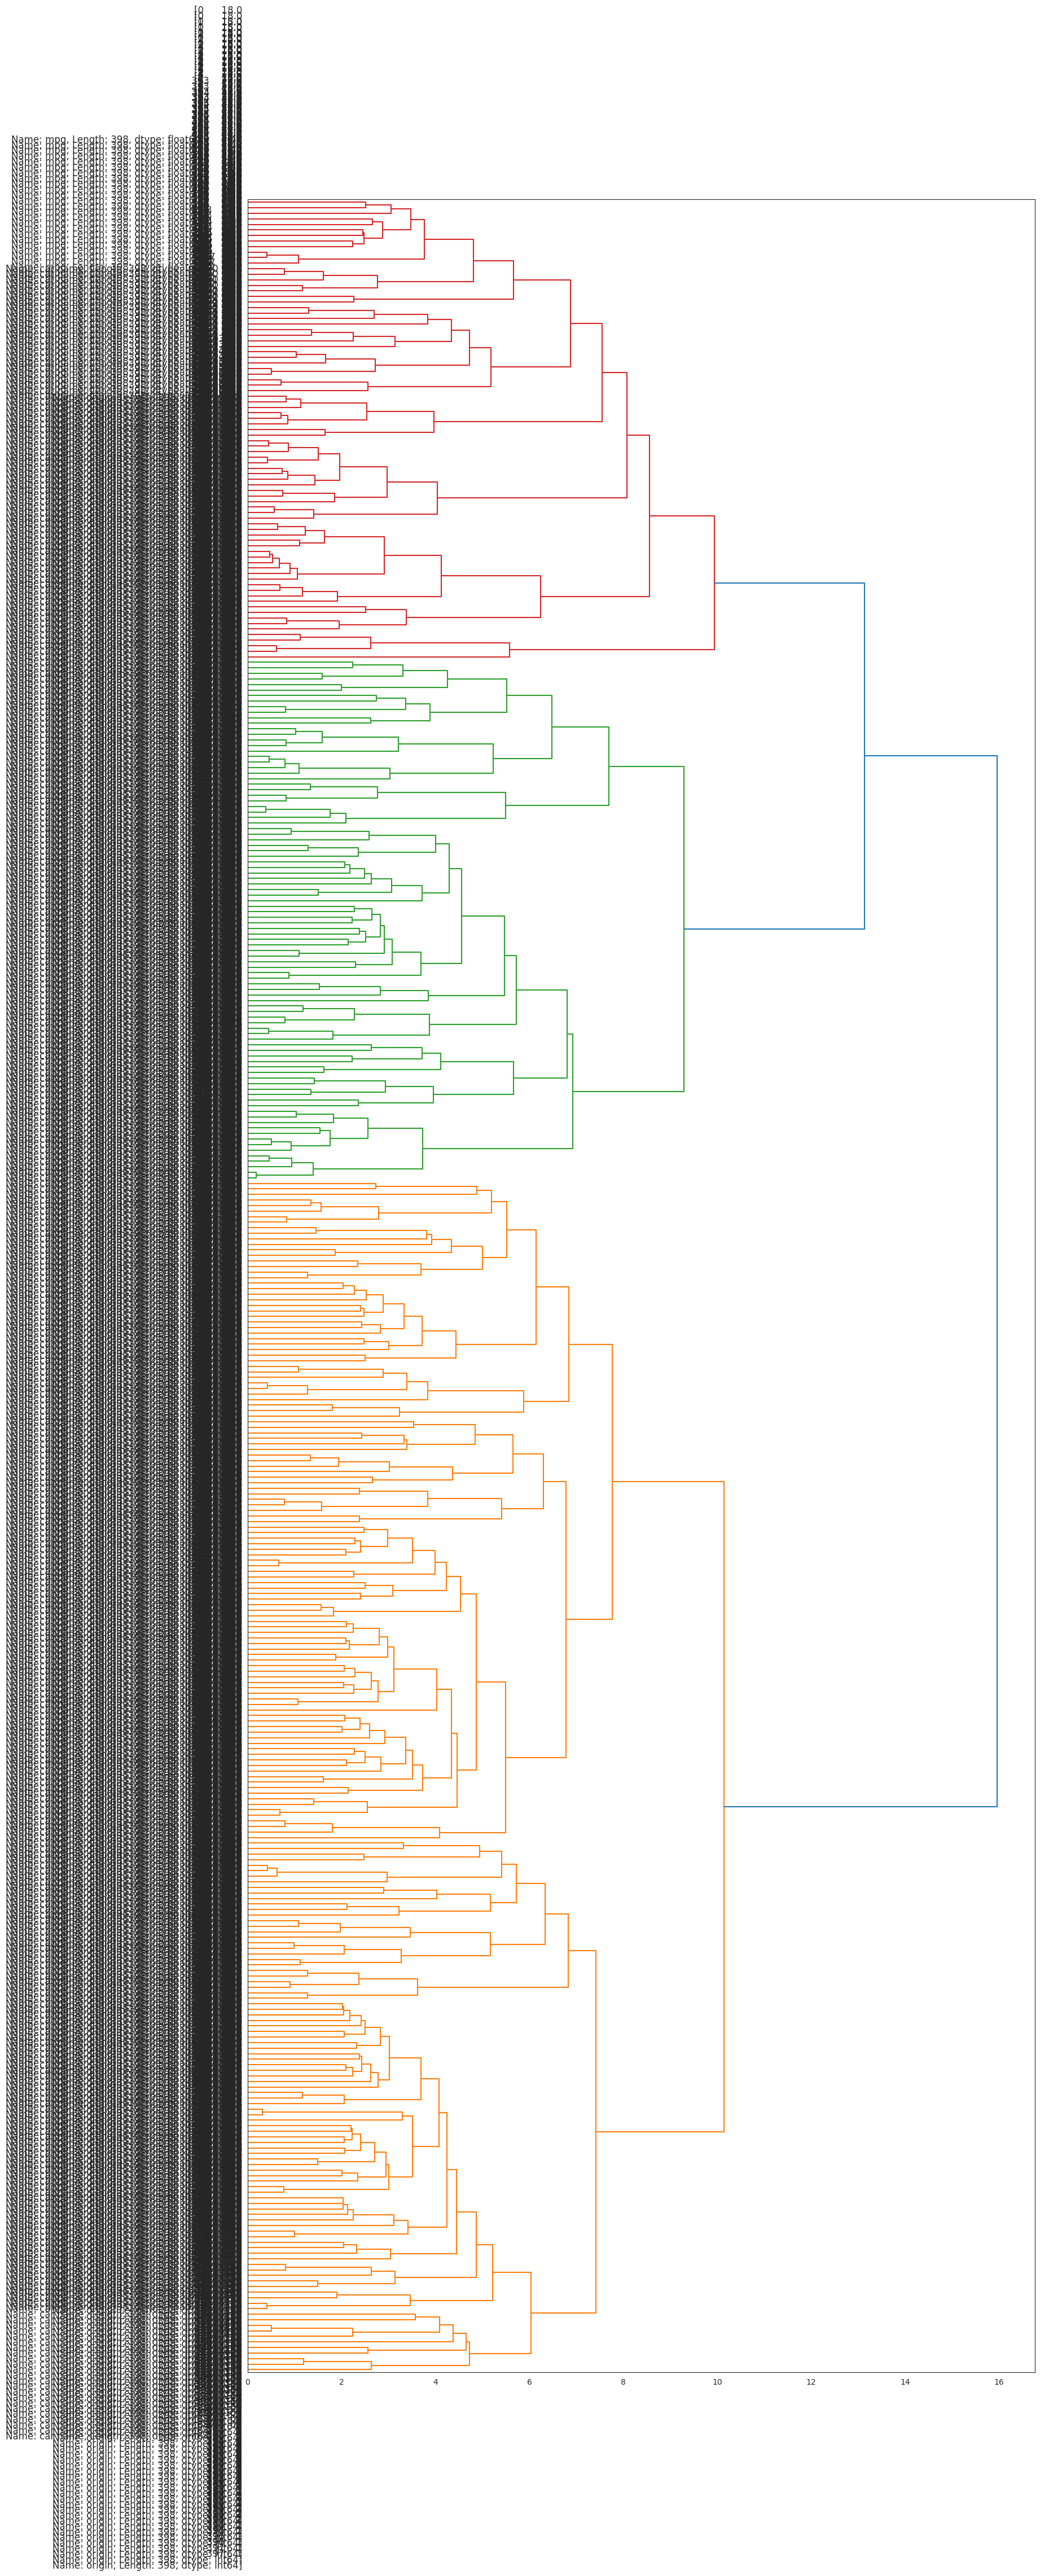

In [117]:

import pylab

fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (data_full1['mpg'], \
                           data_full1['car name'], \
                           (data_full1['origin']))

dendro = hierarchy.dendrogram(Z_using_dist_matrix, leaf_label_func = llf, \
                              leaf_rotation = 0, leaf_font_size = 12, \
                              orientation = 'right')

In [118]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [119]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(dist_matrix)

agglom.labels_

array([0, 0, 0, 2, 2, 0, 4, 4, 4, 0, 0, 0, 0, 4, 3, 5, 5, 5, 3, 3, 1, 3,
       1, 1, 5, 0, 0, 0, 0, 3, 1, 3, 5, 2, 2, 5, 5, 0, 0, 0, 0, 0, 0, 0,
       5, 5, 5, 5, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 3, 1, 5, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 1, 3, 5, 3, 3, 1, 3, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 4, 0, 5, 2, 5, 5, 1, 3, 0, 0, 0, 0, 5, 3, 5, 1,
       3, 1, 5, 1, 0, 0, 1, 3, 1, 1, 2, 3, 3, 0, 5, 5, 2, 3, 1, 3, 1, 2,
       2, 5, 2, 0, 0, 0, 0, 1, 3, 1, 3, 3, 1, 3, 1, 3, 3, 1, 5, 5, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 5, 5, 5, 0, 3, 1, 5, 1, 3, 1, 3, 5, 3, 5, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 2, 0, 0, 5, 5, 1, 5, 1, 1, 3, 3, 5,
       5, 5, 5, 1, 3, 3, 1, 3, 0, 1, 3, 1, 0, 0, 0, 0, 3, 1, 3, 1, 3, 0,
       2, 0, 2, 5, 5, 5, 5, 0, 0, 0, 2, 3, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3,
       3, 1, 3, 3, 3, 2, 0, 2, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 2, 5, 0, 0,
       1, 3, 3, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 5, 5, 1, 5, 5, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 3, 1, 1, 1, 0, 1, 2, 1, 1,

In [122]:
data_full1 = data_full1.iloc[:len(agglom.labels_)]
data_full1['cluster_'] = agglom.labels_
data_full1.head(10)

<ipython-input-122-75ac5c9fdb2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full1['cluster_'] = agglom.labels_


mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   
5  15.0          8         429.0        198    4341          10.0          70   
6  14.0          8         454.0        220    4354           9.0          70   
7  14.0          8         440.0        215    4312           8.5          70   
8  14.0          8         455.0        225    4425          10.0          70   
9  15.0          8         390.0        190    3850           8.5          70   

   origin  car name  cluster_  
0       1        49         0  
1       1        36         0  
2       1       231         0  
3       1        14         2  
4       1       161         2  
5       1       141         0  
6       1        54         4  
7       1       223         4  
8       1       241         4  
9       1         1         0

<ipython-input-125-1845064d7cdf>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepower, subset.mpg, s = subset.origin*10, c=color, \
<ipython-input-125-1845064d7cdf>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepower, subset.mpg, s = subset.origin*10, c=color, \
<ipython-input-125-1845064d7cdf>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequenc

Text(0, 0.5, 'mpg')

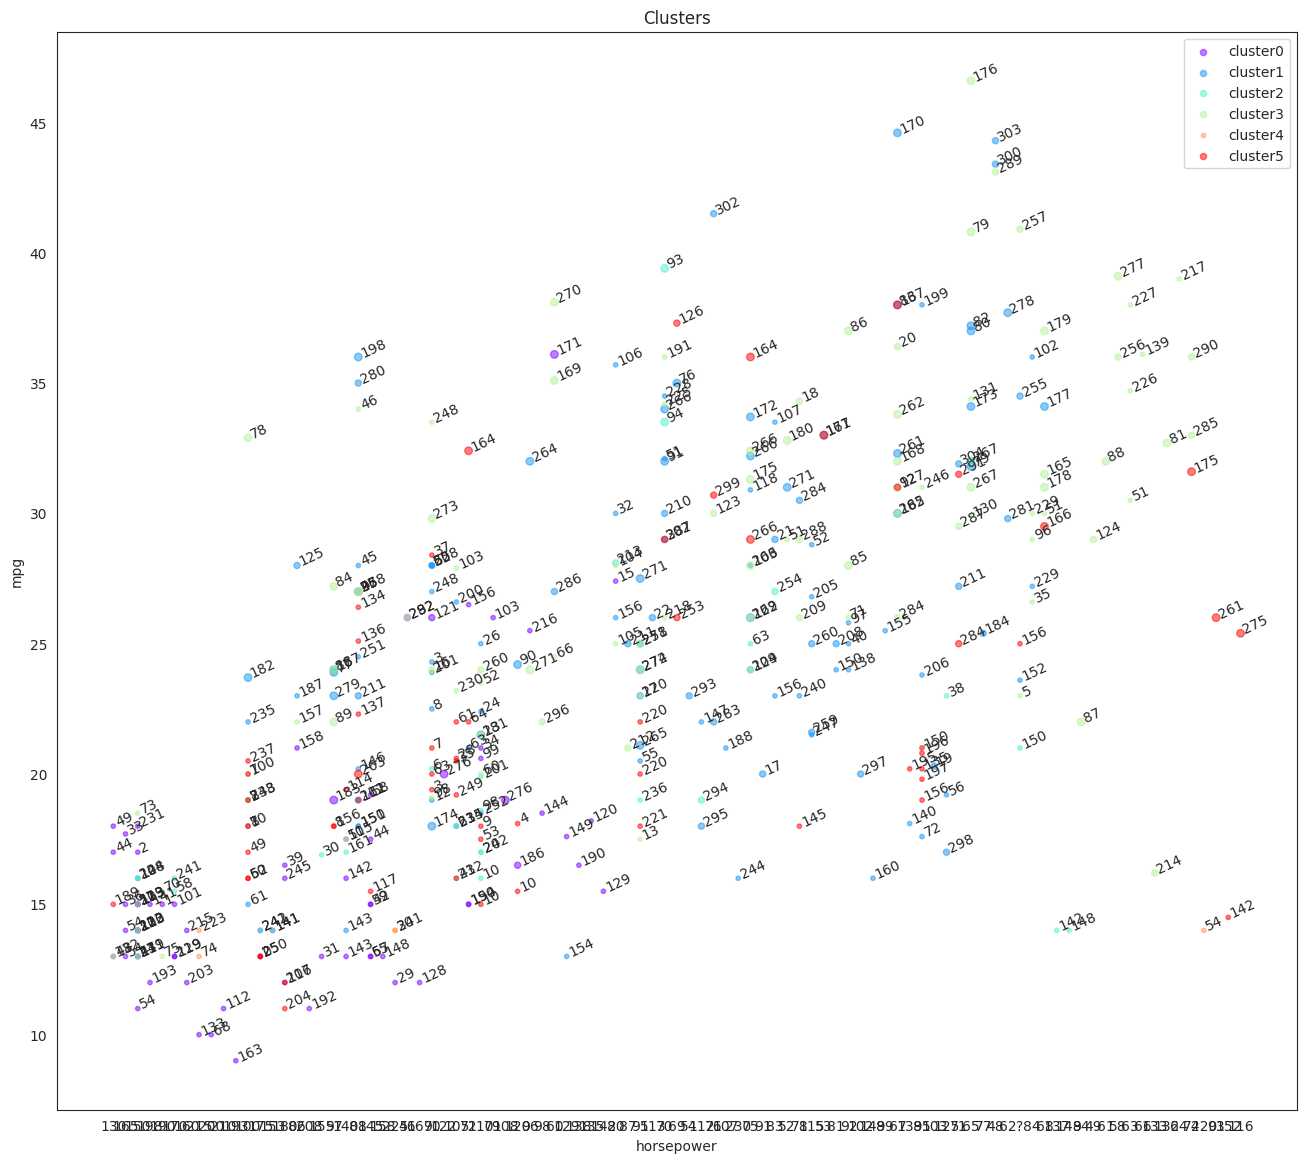

In [125]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_) + 1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize = (16,14))

for color, label in zip(colors, cluster_labels):
    subset = data_full1[data_full1.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepower[i], subset.mpg[i], str(subset['car name'][i]), \
                     rotation=25)
    plt.scatter(subset.horsepower, subset.mpg, s = subset.origin*10, c=color, \
                label = 'cluster' + str(label), alpha=0.5)
# plt.scatter(subset.horsepow, subset.mpg)

plt.legend()
plt.title('Clusters')
plt.xlabel('horsepower')
plt.ylabel('mpg')